## Bharat Intern

### Task 1

Stock price prediction



Predicting stock prices is a common application of machine learning and time series analysis. However, it's important to note that stock price prediction is a complex task due to the inherent volatility and randomness in financial markets. 

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.callbacks import EarlyStopping

### Data Description

In [3]:
df=pd.read_csv('stock price data.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
df.shape

(1009, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [11]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data Preprocessing

In [13]:
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) 

In [14]:
df = df[['Date','Open','Close']] 

In [15]:
df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001
2018-02-12,252.139999,257.950012
2018-02-13,257.290009,258.269989
2018-02-14,260.470001,266.000000
2018-02-15,270.029999,280.269989


C:\Users\NIYAJ\AppData\Local\Temp\ipykernel_11000\1794264774.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


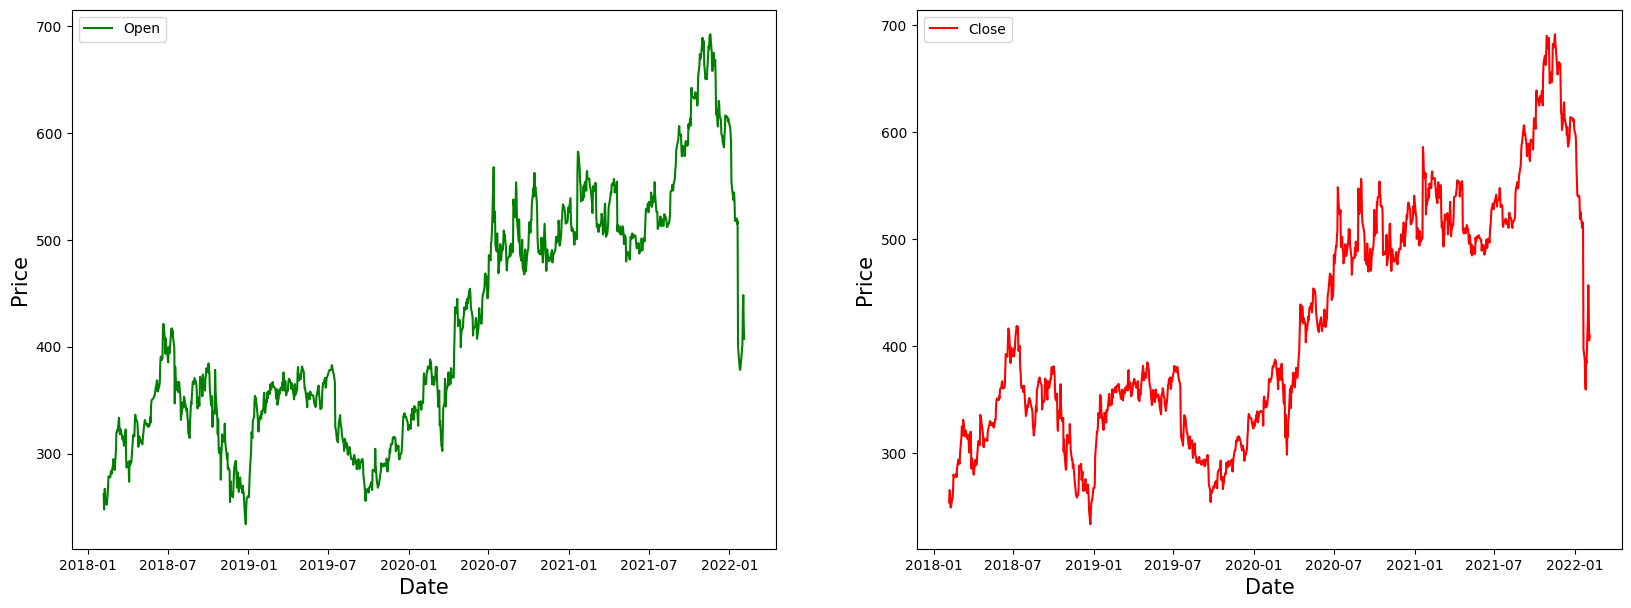

In [16]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [17]:
sc=MinMaxScaler()

In [18]:
df[df.columns] = sc.fit_transform(df)
df.head(10)

C:\Users\NIYAJ\AppData\Local\Temp\ipykernel_11000\2156672202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = sc.fit_transform(df)


,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

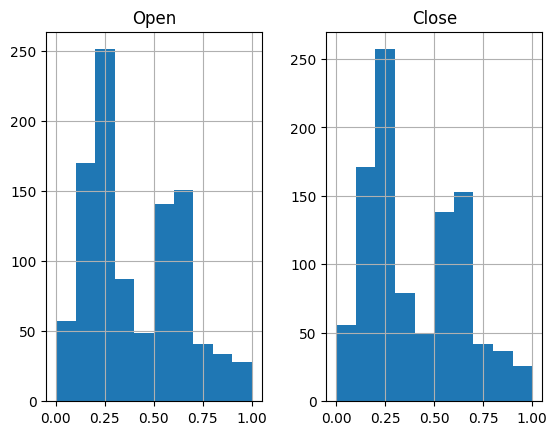

In [19]:
df.hist()


In [23]:
df.shape
# xtr,xtst,ytr,ytst=tts(df)

(1009, 2)

In [25]:
xtr=df[:750]
xtst=df[750:]

In [31]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))



In [32]:
train_seq, train_label = create_sequence(xtr) 
test_seq, test_label = create_sequence(xtst)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((700, 50, 2), (700, 2), (209, 50, 2), (209, 2))

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [34]:
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history=model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1,callbacks=[early_stopping])

Epoch 1/100
22/22 [==============================] - 1s 34ms/step - loss: 0.0013 - mean_absolute_error: 0.0270 - val_loss: 0.0026 - val_mean_absolute_error: 0.0336
Epoch 2/100
22/22 [==============================] - 1s 34ms/step - loss: 0.0012 - mean_absolute_error: 0.0251 - val_loss: 0.0024 - val_mean_absolute_error: 0.0321
Epoch 3/100
22/22 [==============================] - 1s 31ms/step - loss: 0.0012 - mean_absolute_error: 0.0254 - val_loss: 0.0026 - val_mean_absolute_error: 0.0338
Epoch 4/100
22/22 [==============================] - 1s 26ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - val_loss: 0.0027 - val_mean_absolute_error: 0.0355
Epoch 5/100
22/22 [==============================] - 1s 26ms/step - loss: 0.0013 - mean_absolute_error: 0.0267 - val_loss: 0.0025 - val_mean_absolute_error: 0.0340
Epoch 6/100
22/22 [==============================] - 1s 25ms/step - loss: 0.0011 - mean_absolute_error: 0.0254 - val_loss: 0.0039 - val_mean_absolute_error: 0.0464
Epoch 7/100
22/2

In [39]:
test_predicted = model.predict(test_seq)
test_predicted[:10]

7/7 [==============================] - 0s 9ms/step


array([[0.69003975, 0.69535124],
       [0.6938883 , 0.6992508 ],
       [0.6964694 , 0.7016657 ],
       [0.69273895, 0.6977283 ],
       [0.6876769 , 0.6924815 ],
       [0.68402416, 0.6885946 ],
       [0.68290114, 0.68741506],
       [0.6835893 , 0.6881456 ],
       [0.6625771 , 0.6681392 ],
       [0.64309645, 0.6490639 ]], dtype=float32)

In [41]:
test_inverse_predicted = sc.inverse_transform(test_predicted)
test_inverse_predicted[:10]

array([[550.25494, 552.21875],
       [552.0192 , 554.004  ],
       [553.20245, 555.10956],
       [551.49225, 553.307  ],
       [549.1717 , 550.90497],
       [547.49713, 549.1255 ],
       [546.98236, 548.5855 ],
       [547.2978 , 548.9199 ],
       [537.66516, 539.7608 ],
       [528.7347 , 531.02795]], dtype=float32)

In [42]:
df1 = pd.concat([df.iloc[-209:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-209:].index)], axis=1)

In [44]:
df1[['Open','Close']] = sc.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-04-12,551.049988,552.780029,550.254944,552.218750
2021-04-13,557.000000,553.729980,552.019226,554.004028
2021-04-14,554.869995,540.020020,553.202454,555.109558
2021-04-15,544.169983,549.219971,551.492249,553.307007
2021-04-16,550.539978,546.539978,549.171692,550.904968


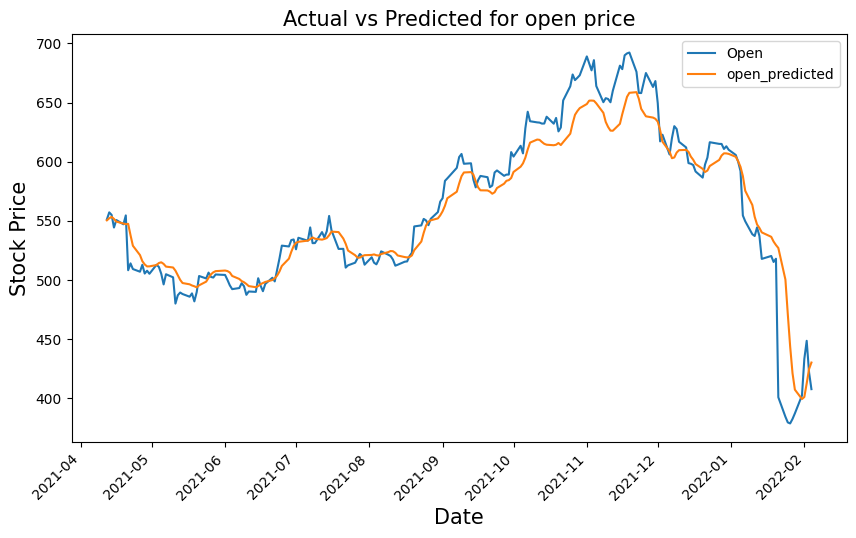

In [47]:
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

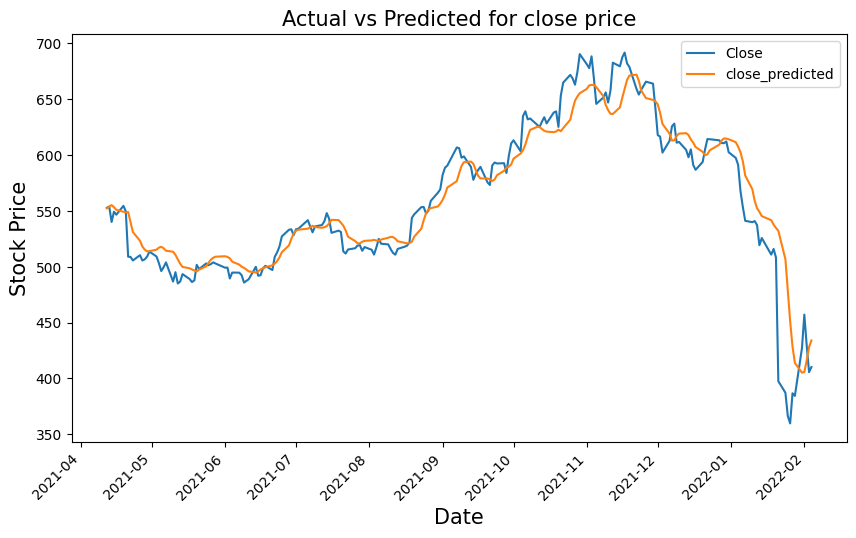

In [48]:
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [49]:
df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,424.364563,428.023376
2022-02-04,407.309998,410.170013,429.828827,433.972717
2022-02-04,NaN,NaN,NaN,NaN
2022-02-05,NaN,NaN,NaN,NaN
2022-02-06,NaN,NaN,NaN,NaN
2022-02-07,NaN,NaN,NaN,NaN
2022-02-08,NaN,NaN,NaN,NaN
2022-02-09,NaN,NaN,NaN,NaN
2022-02-10,NaN,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN,NaN


In [50]:
forecasting_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forecasting_prediction.index=pd.to_datetime(forecasting_prediction.index)

In [52]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forecasting_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 29ms/step


In [55]:
forecasting_prediction[['open','close']] = sc.inverse_transform(forecasting_prediction[['open','close']])

C:\Users\NIYAJ\AppData\Local\Temp\ipykernel_11000\3981464183.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


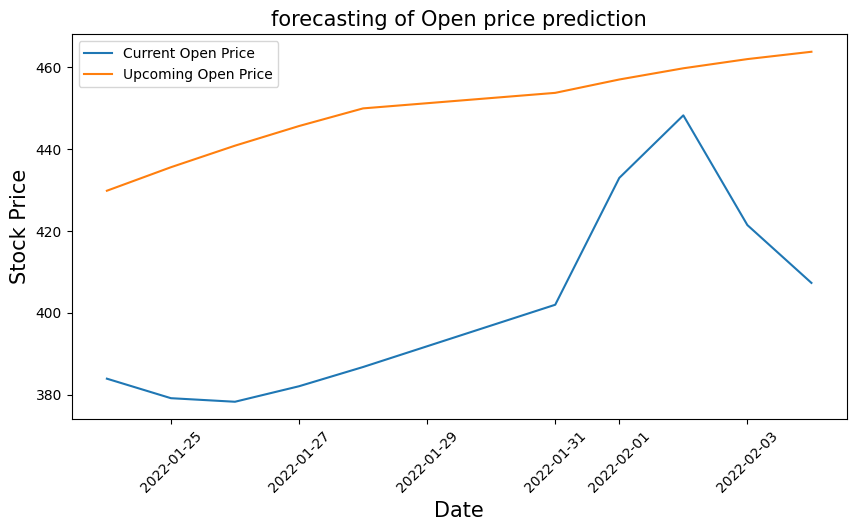

In [57]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forecasting_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forecasting of Open price prediction',size=15)
ax.legend()
fig.show()


C:\Users\NIYAJ\AppData\Local\Temp\ipykernel_11000\1097651154.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


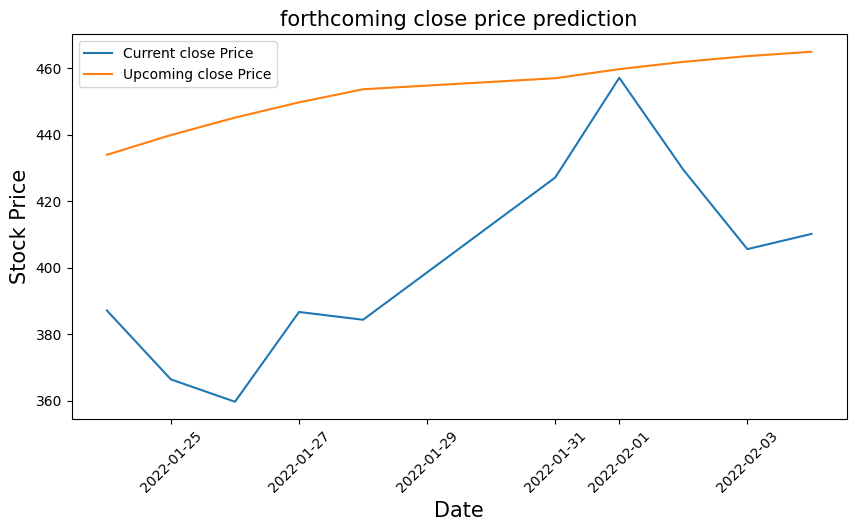

In [58]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forecasting_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()